# Extra credit: Building our own network
In this extra credit assignment, you will try to build your own network for application. The steps are following: 
1. Loading the package and IMDB data.
2. Build the network base on description. In this step, you need to add codes to the network building.
3. validate your network.
Please follow these 3 steps in order, and add codes to build the model in the corresponding place. 


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 4s 0us/step


C:\Users\Soumyashree Sahoo\Anaconda3\envs\tensorflow\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Soumyashree Sahoo\Anaconda3\envs\tensorflow\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## Preparing the data




In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [4]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now our data is ready to be fed into a neural network.

## Building our network 




Here's what our network looks like:

![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

And here's the Keras implementation, very similar to the MNIST example you saw previously:

In [7]:
from keras import models
from keras import layers
from keras.layers import Dense

model = models.Sequential()
model.add(Dense(16, input_dim=10000, activation= 'relu'))#Add code here. This is the first layer with 16 nodes and relu activation function, input shape is (10000,0).
model.add(Dense(16, activation= 'relu'))#Add code here. This is the second layer with 16 nodes and  activation function relu.
model.add(Dense(1, input_dim=10000, activation= 'sigmoid'))#Add code here. This is the Third layer with 1 nodes and  activation function sigmoid.

In [8]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validating our approach



In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.5444 - binary_accuracy: 0.7711 - val_loss: 0.4366 - val_binary_accuracy: 0.8498
Epoch 2/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.3465 - binary_accuracy: 0.9021 - val_loss: 0.3325 - val_binary_accuracy: 0.8872
Epoch 3/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2502 - binary_accuracy: 0.9269 - val_loss: 0.2852 - val_binary_accuracy: 0.8921
Epoch 4/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1862 - binary_accuracy: 0.9414 - val_loss: 0.2832 - val_binary_accuracy: 0.8872
Epoch 5/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1528 - binary_accuracy: 0.9521 - val_loss: 0.2787 - val_binary_accuracy: 0.8883
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1248 - binary_accuracy: 0.9619 - val_loss: 0.2982 - val_binary

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

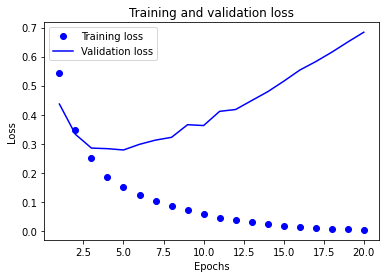

In [14]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

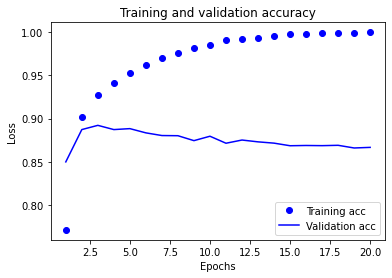

In [15]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.4572 - accuracy: 0.8225
Epoch 2/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.2571 - accuracy: 0.9112
Epoch 3/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.1998 - accuracy: 0.9285
Epoch 4/4
25000/25000 [==============================] - 5s 211us/step


In [17]:
results

[0.3042991485881805, 0.880840003490448]